segment_id               6838
wellbore_chev_no_id        21
area_id                     2
formation_id              239
bit_model_id               38
drillbit_size               7
min_depth                 990
max_depth                1542
rate_of_penetration      6838
surface_weight_on_bit    6837
surface_rpm              6210
dtype: int64
(1026, 1)
(1026, 1)
25.968864476979746
          Actual  Prediction
0     227.103109  232.661316
1      78.116084   68.739868
2      55.749590   66.812782
3      46.947824   50.009209
4     163.160333  173.099960
5     105.309330  106.487198
6     115.418377  123.175247
7     138.143219  140.084534
8     102.287113   99.112907
9      77.027467   50.865601
10    120.285998  108.955856
11     78.117781   79.888161
12     71.308891   94.895546
13     58.593417   73.939148
14     43.936250   75.112701
15    191.948166  180.590454
16     99.284859   81.301933
17    121.356377  123.073097
18     89.865083  104.043655
19    131.967490  118.832207
20     96

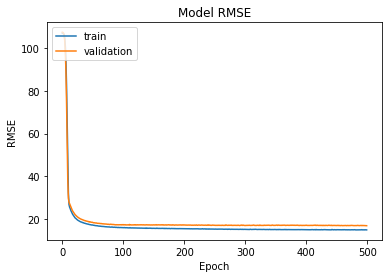

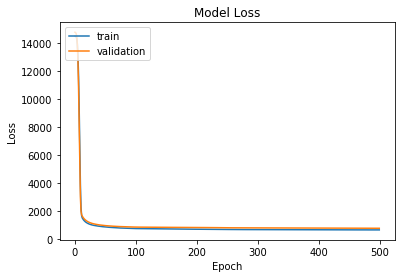

'\n#cross val\nfor train_index, test_index in kf.split(X):\n    #print("TRAIN:", train_index, "TEST:", test_index)\n    X_train, X_test = X[train_index], X[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n   \n   #lsvc = linear_model.Lasso(alpha=1, max_iter = 1000).fit(X_train, y_train)\n    #y_pred = lsvc.predict(X_test)\n    #regressor = RandomForestRegressor(n_estimators=100, max_depth = 15, random_state=0)\n    #regressor.fit(X_train, y_train)\n    #y_pred = regressor.predict(X_test)\n    #print (y_pred)\n    #print (y_test)\n    #print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))\n    \n    \n    model = Sequential()\n    model.add(Dense(2, input_dim=311, activation=\'linear\'))\n    model.add(Dense(5, kernel_initializer=\'normal\',activation=\'linear\'))\n    model.add(Dense(5, kernel_initializer=\'normal\',activation=\'linear\'))\n    model.add(Dense(1))\n    model.compile(loss=\'mse\', optimizer=\'adam\', metrics=[rmse])\n    history = model.fit(X_trai

In [78]:
import numpy as np 
import pandas as pd 


import sklearn
from sklearn.linear_model import Lasso
from tensorflow.python.client import device_lib

import numpy as np
import pandas as pd
import sklearn
from keras.utils import to_categorical

#parse out annoying strings in front 
training_data = pd.read_csv('training.csv', delimiter = ',') #training data frame
#training_data['segment_id'] =  training_data['segment_id'].apply(lambda x: int(x[10:]))
training_data['wellbore_chev_no_id'] =  training_data['wellbore_chev_no_id'].apply(lambda x: int(x[17:]))
training_data['area_id'] =  training_data['area_id'].apply(lambda x: int(x[5:]))
training_data['formation_id'] =  training_data['formation_id'].apply(lambda x: int(x[10:]))
training_data['bit_model_id'] =  training_data['bit_model_id'].apply(lambda x: int(x[10:]))

#training_data.to_csv('Clean Data.csv')

print (training_data.nunique())

#print (training_data)

#print (training_data.isnull().sum(axis = 0)) #no null values 

from sklearn.datasets import load_iris
from sklearn import preprocessing


y = np.array(training_data['rate_of_penetration'])
#y = preprocessing.scale(y)
X = np.array(training_data.drop(['segment_id','rate_of_penetration'], axis=1))



from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from keras import backend
 


#one-hot encoding
X = pd.get_dummies(data=training_data, columns=['wellbore_chev_no_id', 'area_id', 'formation_id', 'bit_model_id', 'drillbit_size'])
cols_to_norm = ['min_depth','max_depth', 'surface_weight_on_bit', 'surface_rpm']
X[cols_to_norm] = X[cols_to_norm].apply(lambda x: preprocessing.scale(x)) #only standardize non-one-hot columns
#print (X)
X = np.array(X.drop(['segment_id','max_depth','rate_of_penetration'], axis=1))
#print(pd.get_dummies(training_data['wellbore_chev_no_id']))
#print (X.nunique())





#Models
from sklearn.model_selection import KFold #K fold cross validation 
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=10)
kf.get_n_splits(X)

#grid search for parameters
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
from matplotlib import pyplot as plt
from keras import optimizers #try adam and sgd

import numpy as np
from sklearn.model_selection import train_test_split
#for a in [0.01, 0.05, 0.1, 0.5, 1, 5]:
    #for m in [100,500,1000,5000,10000]:
    
    
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) #split data (85% train, 15% test)



model1 = Sequential()
model1.add(Dense(2, input_dim=310, activation='relu'))
model1.add(Dense(5, kernel_initializer='normal',activation='relu'))
model1.add(Dense(5, kernel_initializer='normal',activation='relu'))
model1.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))

#IMPORTANT - use this if you want to train, and comment out load weights
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss='mse', optimizer='adam', metrics=[rmse])
#history = model1.fit(X_train, y_train, validation_split=0.15, epochs=500, batch_size=100, verbose=2)
#model1.save_weights("NN.h5")


#IMPORTANT - load pre-existing weights for best model, no need to train
model1.load_weights('NN.h5')

model2 = Sequential()
model2.add(Dense(2, input_dim=310, activation='relu'))
model2.add(Dense(7, kernel_initializer='normal',activation='relu'))
model2.add(Dense(7, kernel_initializer='normal',activation='relu'))
model2.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
model2.compile(loss='mse', optimizer='adam', metrics=[rmse])
#history = model2.fit(X_train, y_train, validation_split=0.15, epochs=500, batch_size=150, verbose=2)
#model2.save_weights("NN2.h5")

model2.load_weights('NN2.h5')


model3 = Sequential()
model3.add(Dense(2, input_dim=310, activation='relu'))
model3.add(Dense(6, kernel_initializer='normal',activation='relu'))
model3.add(Dense(6, kernel_initializer='normal',activation='relu'))
model3.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
model3.compile(loss='mse', optimizer='adam', metrics=[rmse])
#history = model3.fit(X_train, y_train, validation_split=0.15, epochs=500, batch_size=150, verbose=2)
#model3.save_weights("NN3.h5")

model3.load_weights('NN3.h5')



model4 = Sequential()
model4.add(Dense(2, input_dim=310, activation='relu'))
model4.add(Dense(8, kernel_initializer='normal',activation='relu'))
model4.add(Dense(8, kernel_initializer='normal',activation='relu'))
model4.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
model4.compile(loss='mse', optimizer='adam', metrics=[rmse])
#history = model4.fit(X_train, y_train, validation_split=0.15, epochs=500, batch_size=150, verbose=2)
#model4.save_weights("NN4.h5")

model4.load_weights('NN4.h5')


"""
use this to calc rmse between two vectors of the same length
"""
import math
def rmse_non_tensor(a,b):
    total = 0
    for i in range(len(a)):
        total += (a[i]-b[i])**2
    total = total/len(a)
    total = math.sqrt(total)
    return total

y_pred1 = model1.predict(X_test) #model prediction on X test set
y_pred2 = model2.predict(X_test) #model prediction on X test set
y_pred3 = model3.predict(X_test) #model prediction on X test set
y_pred4 = model4.predict(X_test) #model prediction on X test set


y_pred = ((y_pred1 + y_pred2 + y_pred3 + y_pred4)/4.0)

y_test = np.reshape(y_test,(1026,1))
print (y_pred.shape)
print (y_test.shape)

print (rmse_non_tensor(y_pred,y_test))


final = np.concatenate((y_test, y_pred), axis=1) #test is actual, pred is prediction

final = pd.DataFrame(final)
final.columns = ['Actual', 'Prediction']
print (final)


#summarize history for rmse
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



"""
#cross val
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   
   #lsvc = linear_model.Lasso(alpha=1, max_iter = 1000).fit(X_train, y_train)
    #y_pred = lsvc.predict(X_test)
    #regressor = RandomForestRegressor(n_estimators=100, max_depth = 15, random_state=0)
    #regressor.fit(X_train, y_train)
    #y_pred = regressor.predict(X_test)
    #print (y_pred)
    #print (y_test)
    #print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    
    model = Sequential()
    model.add(Dense(2, input_dim=311, activation='linear'))
    model.add(Dense(5, kernel_initializer='normal',activation='linear'))
    model.add(Dense(5, kernel_initializer='normal',activation='linear'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=[rmse])
    history = model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=2)

"""    

#try different activation functions
#different optimizers 

